In [2]:
%pylab inline
from trafficpassion import AnalyzeWiggles, IdentifyJams

Populating the interactive namespace from numpy and matplotlib


In [3]:
# %pylab inline
# %run trafficPassion/analyzeWiggles.py
# %run trafficPassion/IdentifyJams.py

# Table of Contents
## DATA ENGINERING
## KEY TRAFFIC METRICS
### Average Occupancy, Total Flow and Speed
### Mean, Smoothed Mean and Wiggle Magnitude
### Comparing Across Years

# DATA ENGINEERING
### Load I15 Southbound Data

In [8]:
i15S = AnalyzeWiggles.loadHighwayData('data/I15S_data2.csv') 
i15S['AvgDensity'] = i15S['TotalFlow']/i15S['AvgSpeed']

# KEY TRAFFIC METRICS
### Average Occupancy, Flow and Speed
When first looking at the traffic data, smoothing the mean across all stations and all days provides a general understanding of typical traffic patters throughout a day across the freeway cooridor.

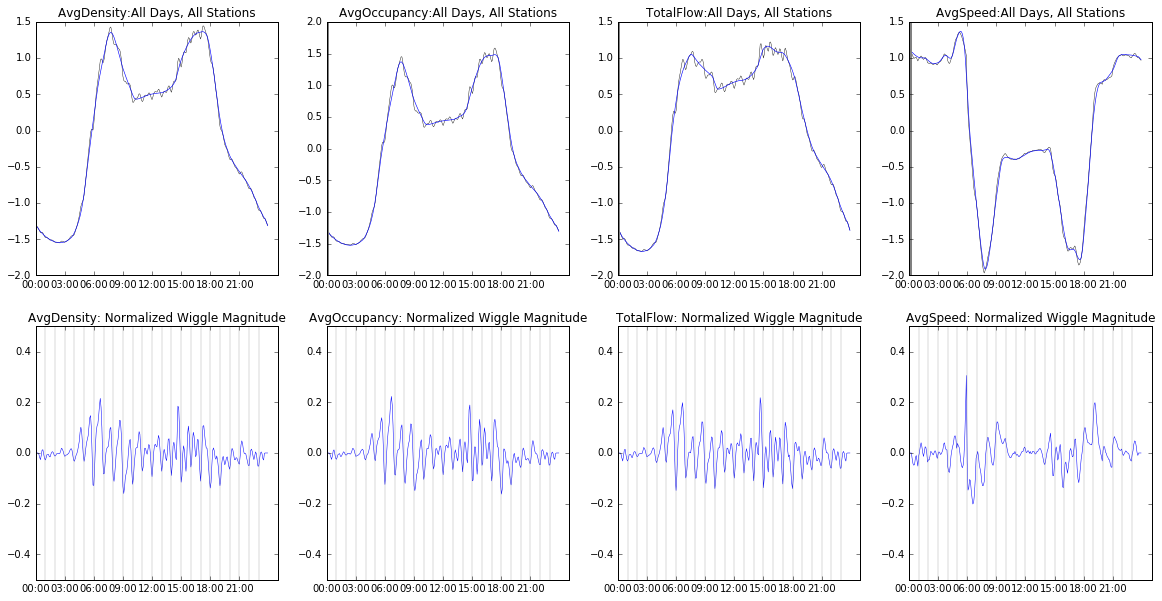

In [10]:
AnalyzeWiggles.chartMetrics(i15S, "All Days, All Stations")

### Average Occupancy, Flow and Speed on Weekdays across All Stations
Weekday traffic varies from weekend traffic because of typical work schedules.  Weekend patterns and Weekday patterns are distinct.

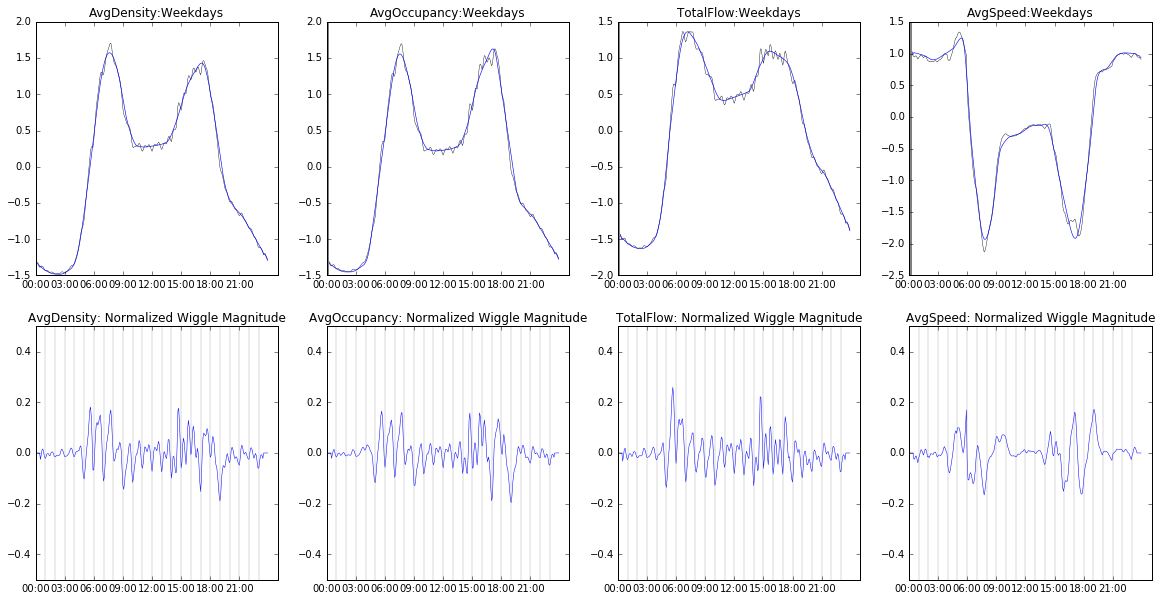

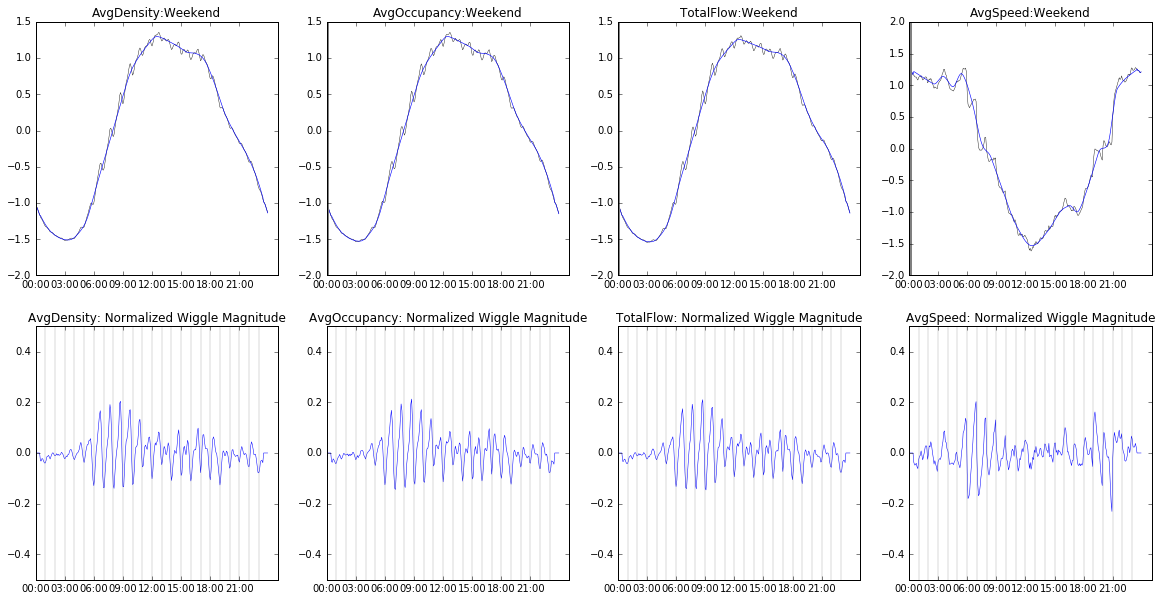

In [11]:
# %run trafficPassion/analyzeWiggles.py
AnalyzeWiggles.chartMetrics(i15S, "Weekdays", "akima", 12, 'Weekdays', metrics="All", byStation=False)
AnalyzeWiggles.chartMetrics(i15S, "Weekend", "akima", 12, 'Weekends', metrics="All", byStation=False)

### Total Flow and Average Density on Weekdays across All Stations
Zooming into Total Flow, the magnitude of the wiggle is consistently at its minimum at the top of the hour, regardless of how much we smooth the mean.

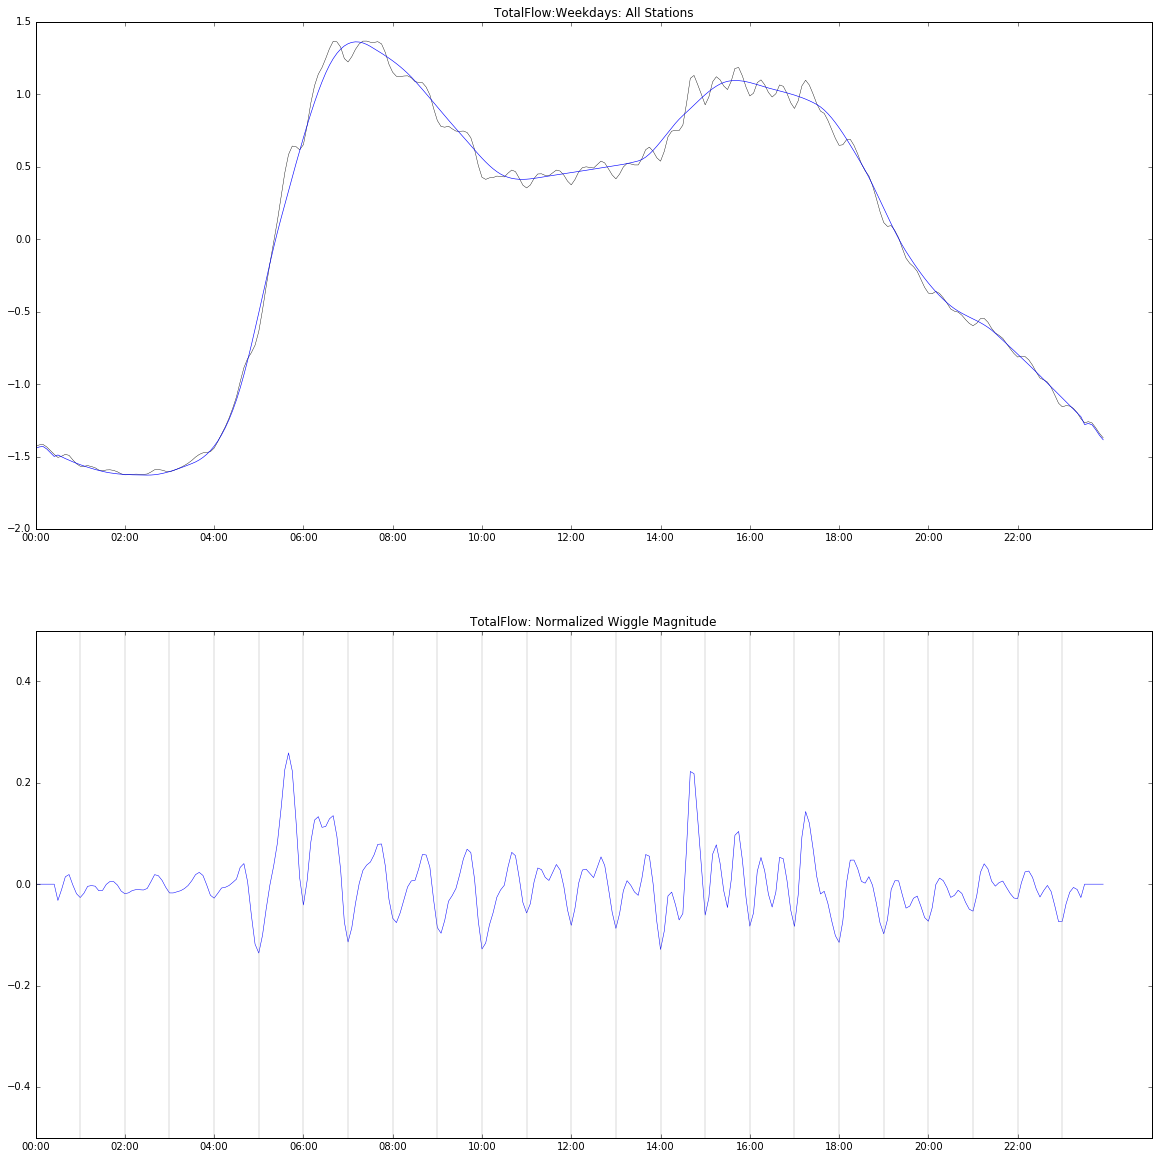

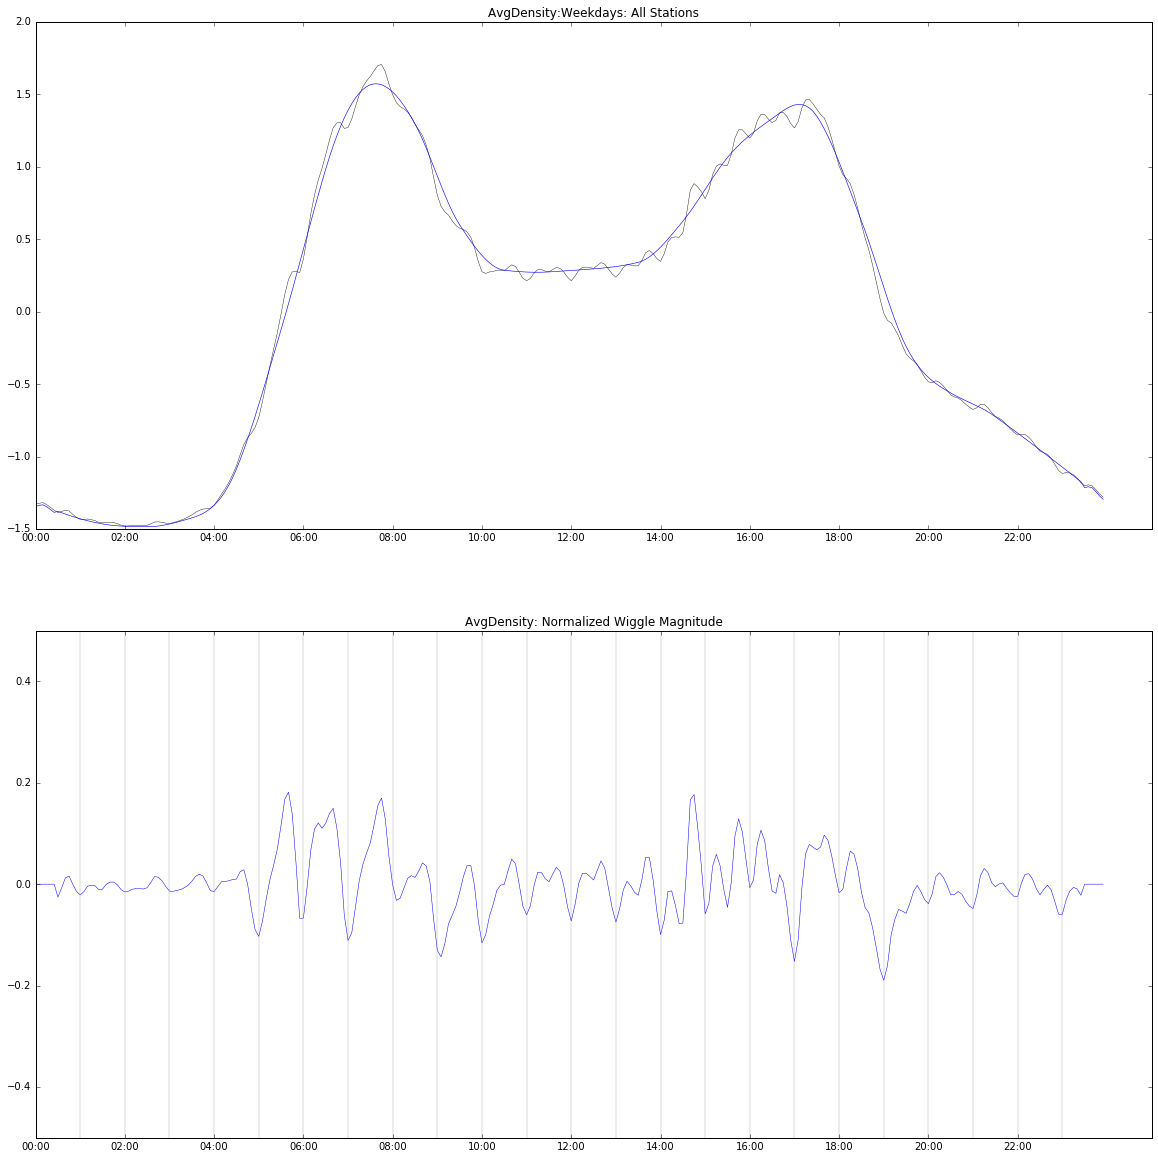

In [12]:
#%run trafficPassion/analyzeWiggles.py
AnalyzeWiggles.chartMetrics(i15S, title="Weekdays: All Stations", type="akima", factor=12, days='Weekdays',
                            metrics='TotalFlow')
AnalyzeWiggles.chartMetrics(i15S, title="Weekdays: All Stations", type="akima", factor=12, days='Weekdays',
                            metrics='AvgDensity')

## Analysis By Station
After looking at averages across all stations, analyzing particular station trends shows that there are some outlier stations.

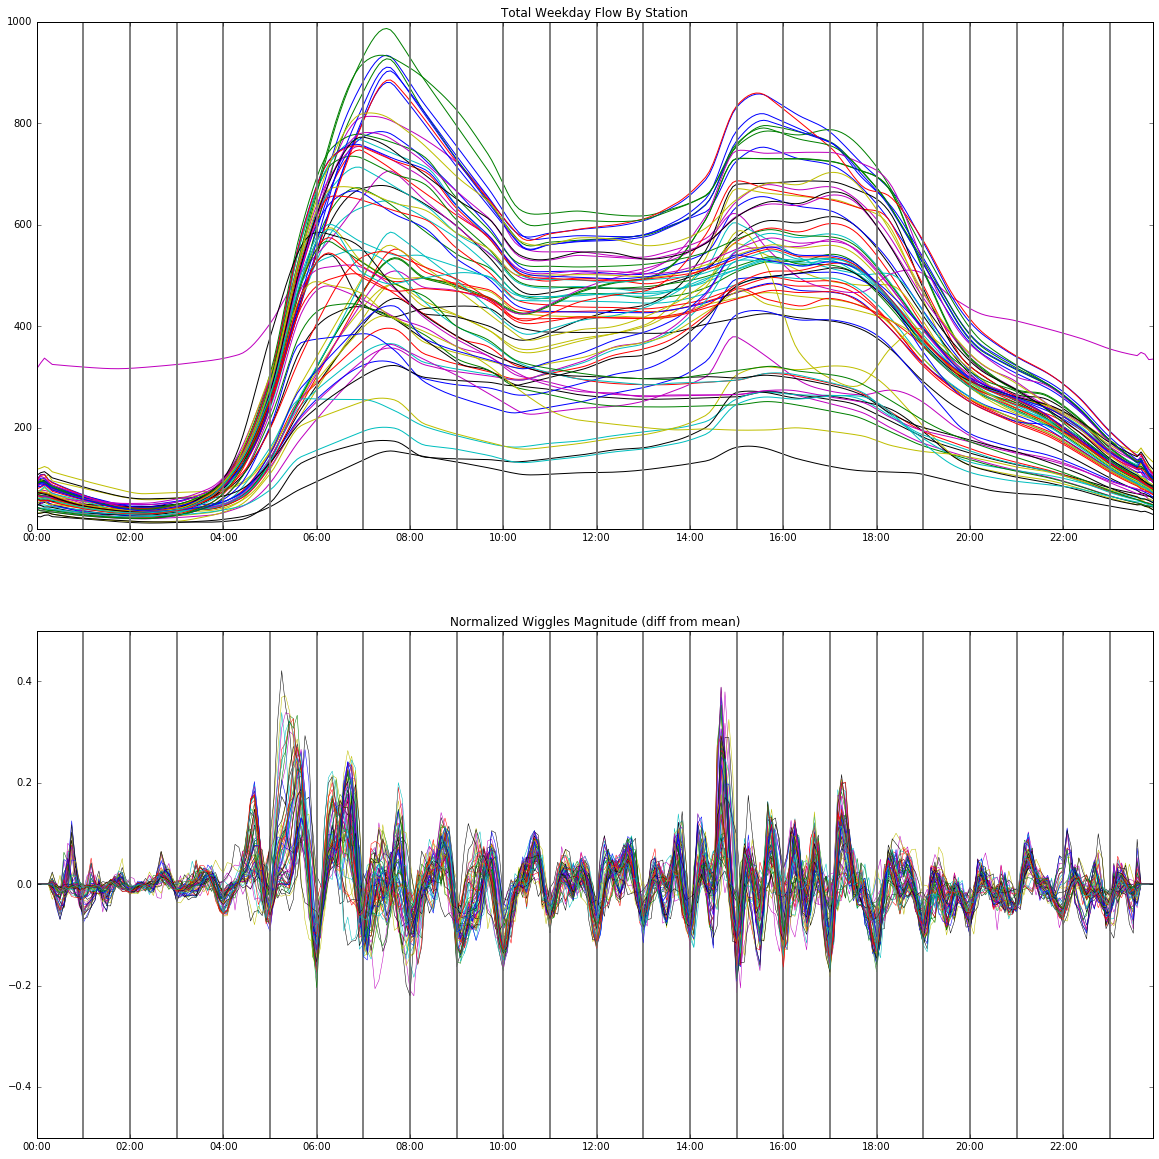

In [13]:
# %run trafficPassion/analyzeWiggles.py
AnalyzeWiggles.chartMetrics(i15S, title="Total Weekday Flow By Station", type="akima", factor=8, days='Weekdays',
                            metrics='TotalFlow', byStation=True)

### It is known that some station sensors are not healthy. When healthy stations are plotted, we see another pattern.

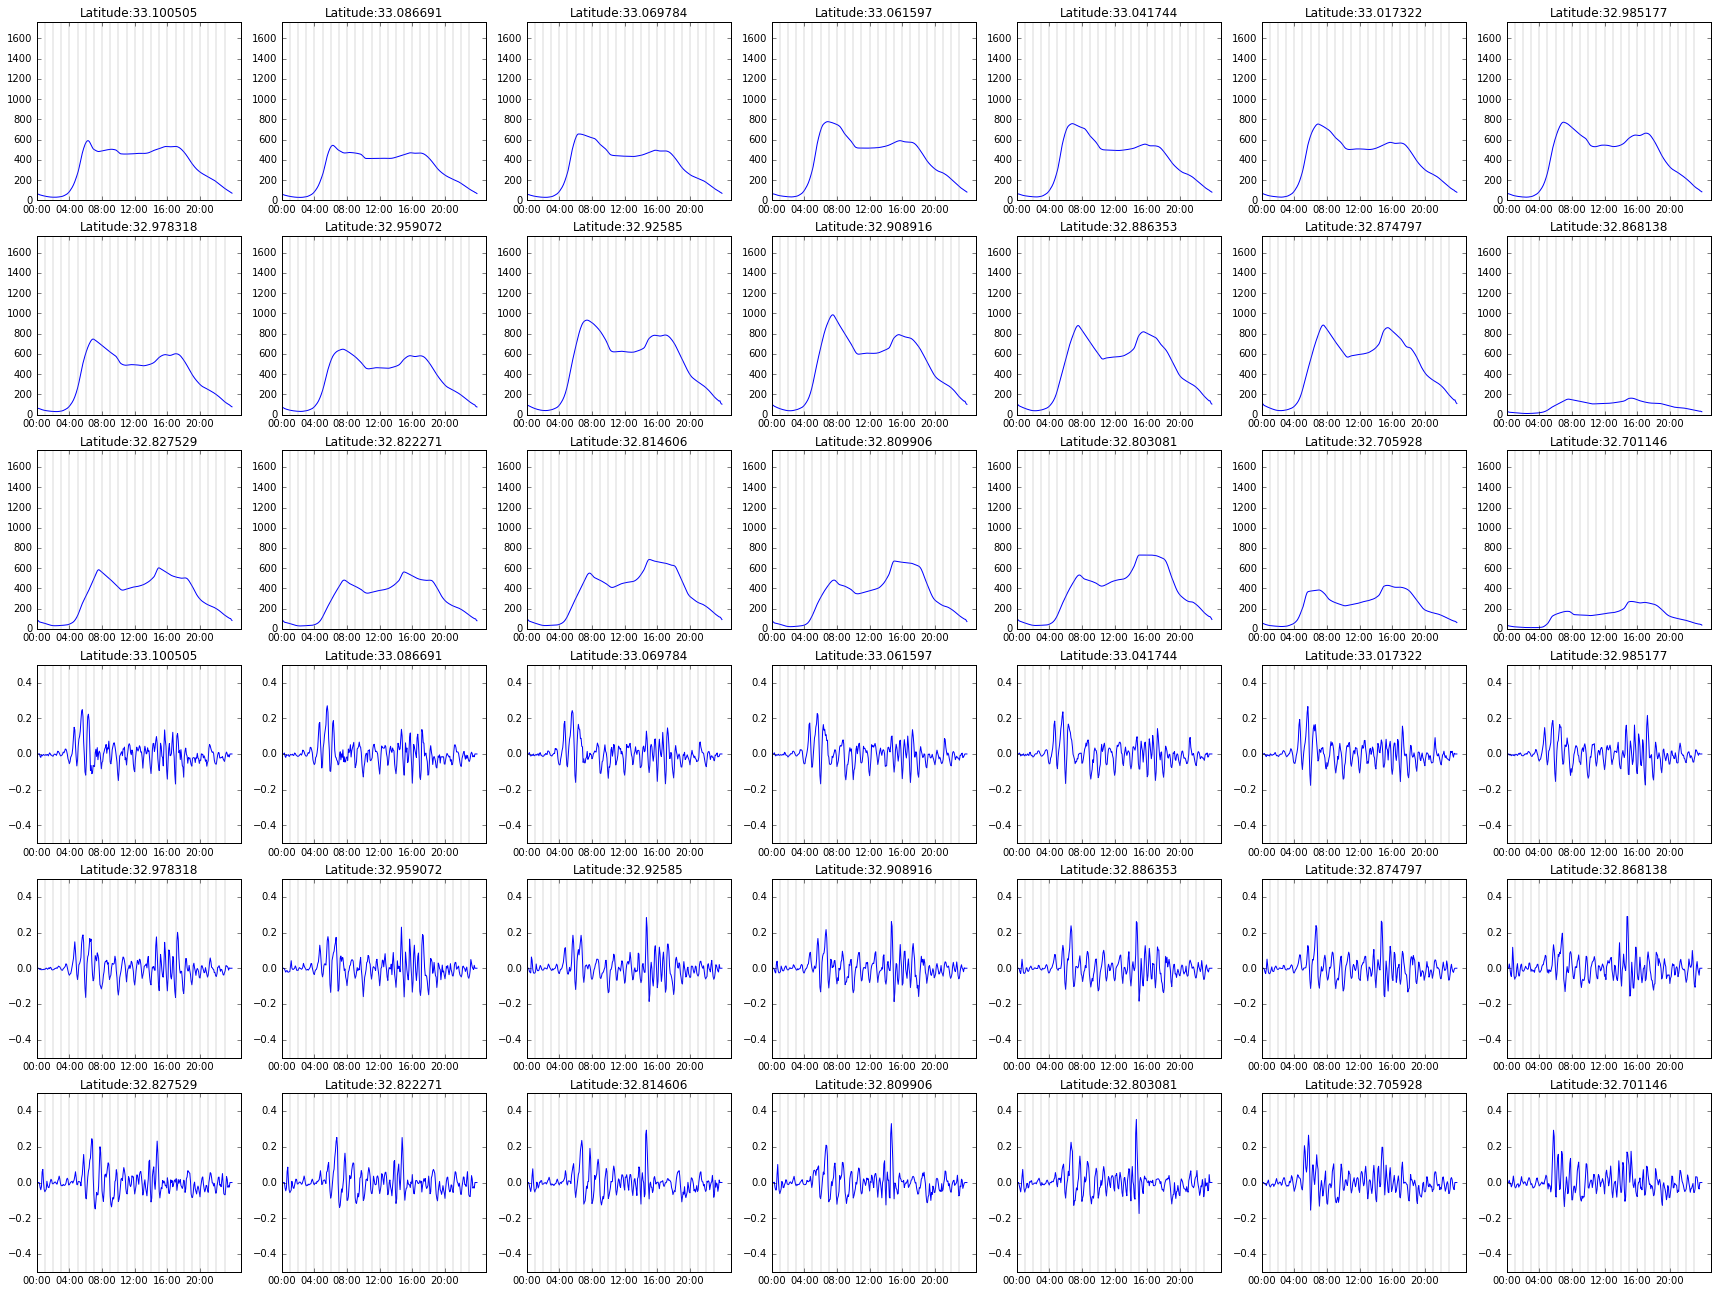

In [15]:
# %run trafficPassion/analyzeWiggles.py
AnalyzeWiggles.chartMetrics(AnalyzeWiggles.getRankOneStations(i15S), title="Total Weekday Flow For Healthy Stations",
                            type="akima", factor=8, days='Weekdays', metrics='TotalFlow', stationGrid=10)

# Compare Mean Flow and Wiggle Magnitude Across All Years

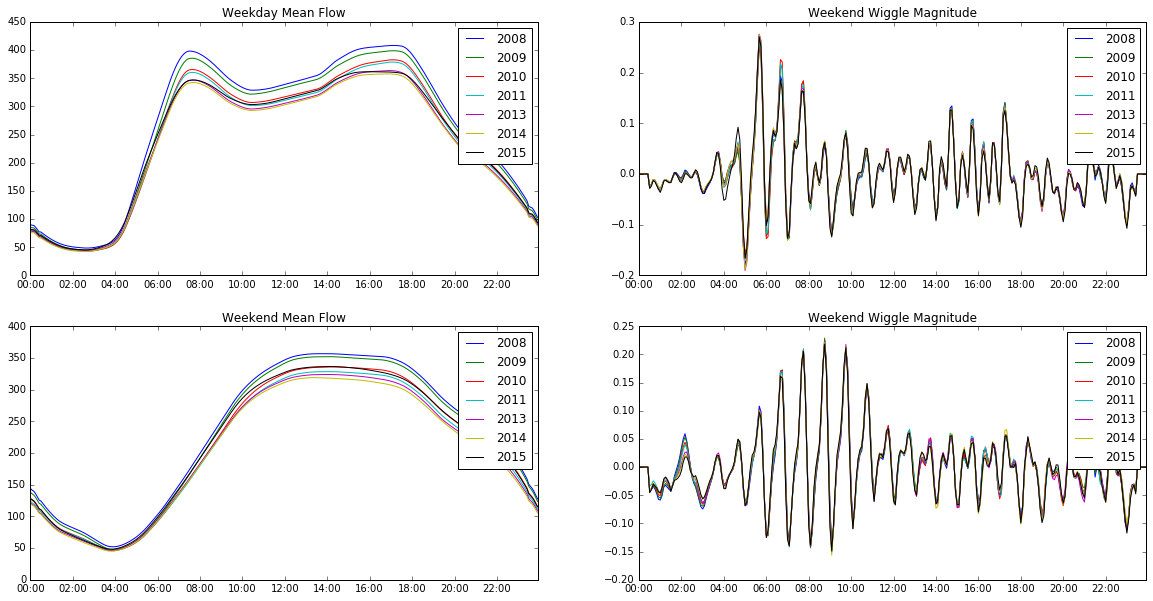

In [16]:
# %run trafficPassion/analyzeWiggles.py
AnalyzeWiggles.getWigglesForAllYears()

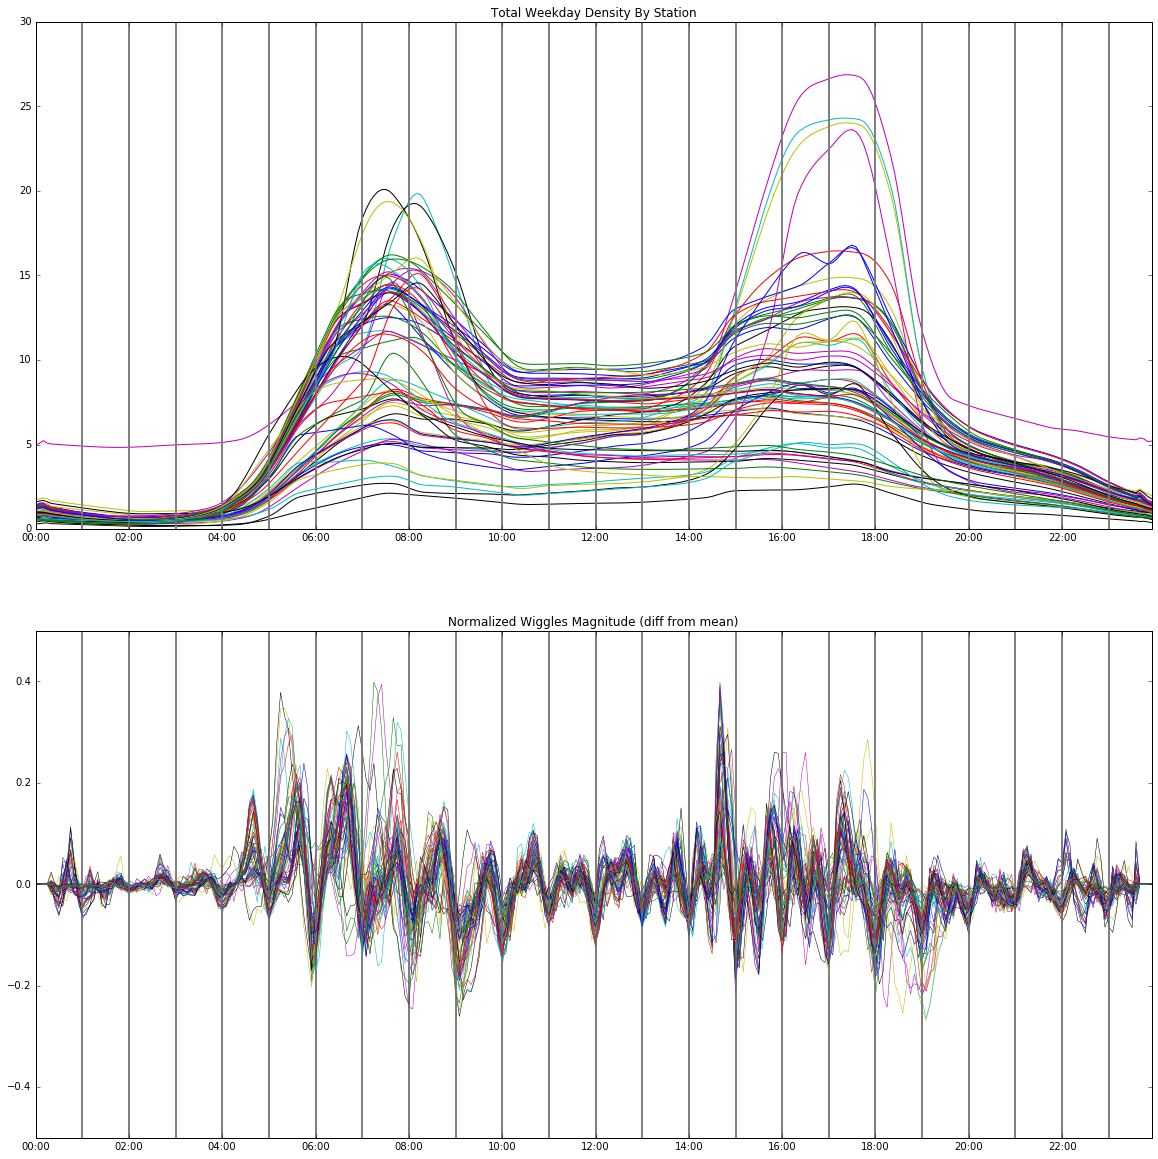

In [17]:
# %run trafficPassion/analyzeWiggles.py
AnalyzeWiggles.chartMetrics(i15S, title="Total Weekday Density By Station", type="akima", factor=8, days='Weekdays',
                            metrics='AvgDensity', byStation=True)

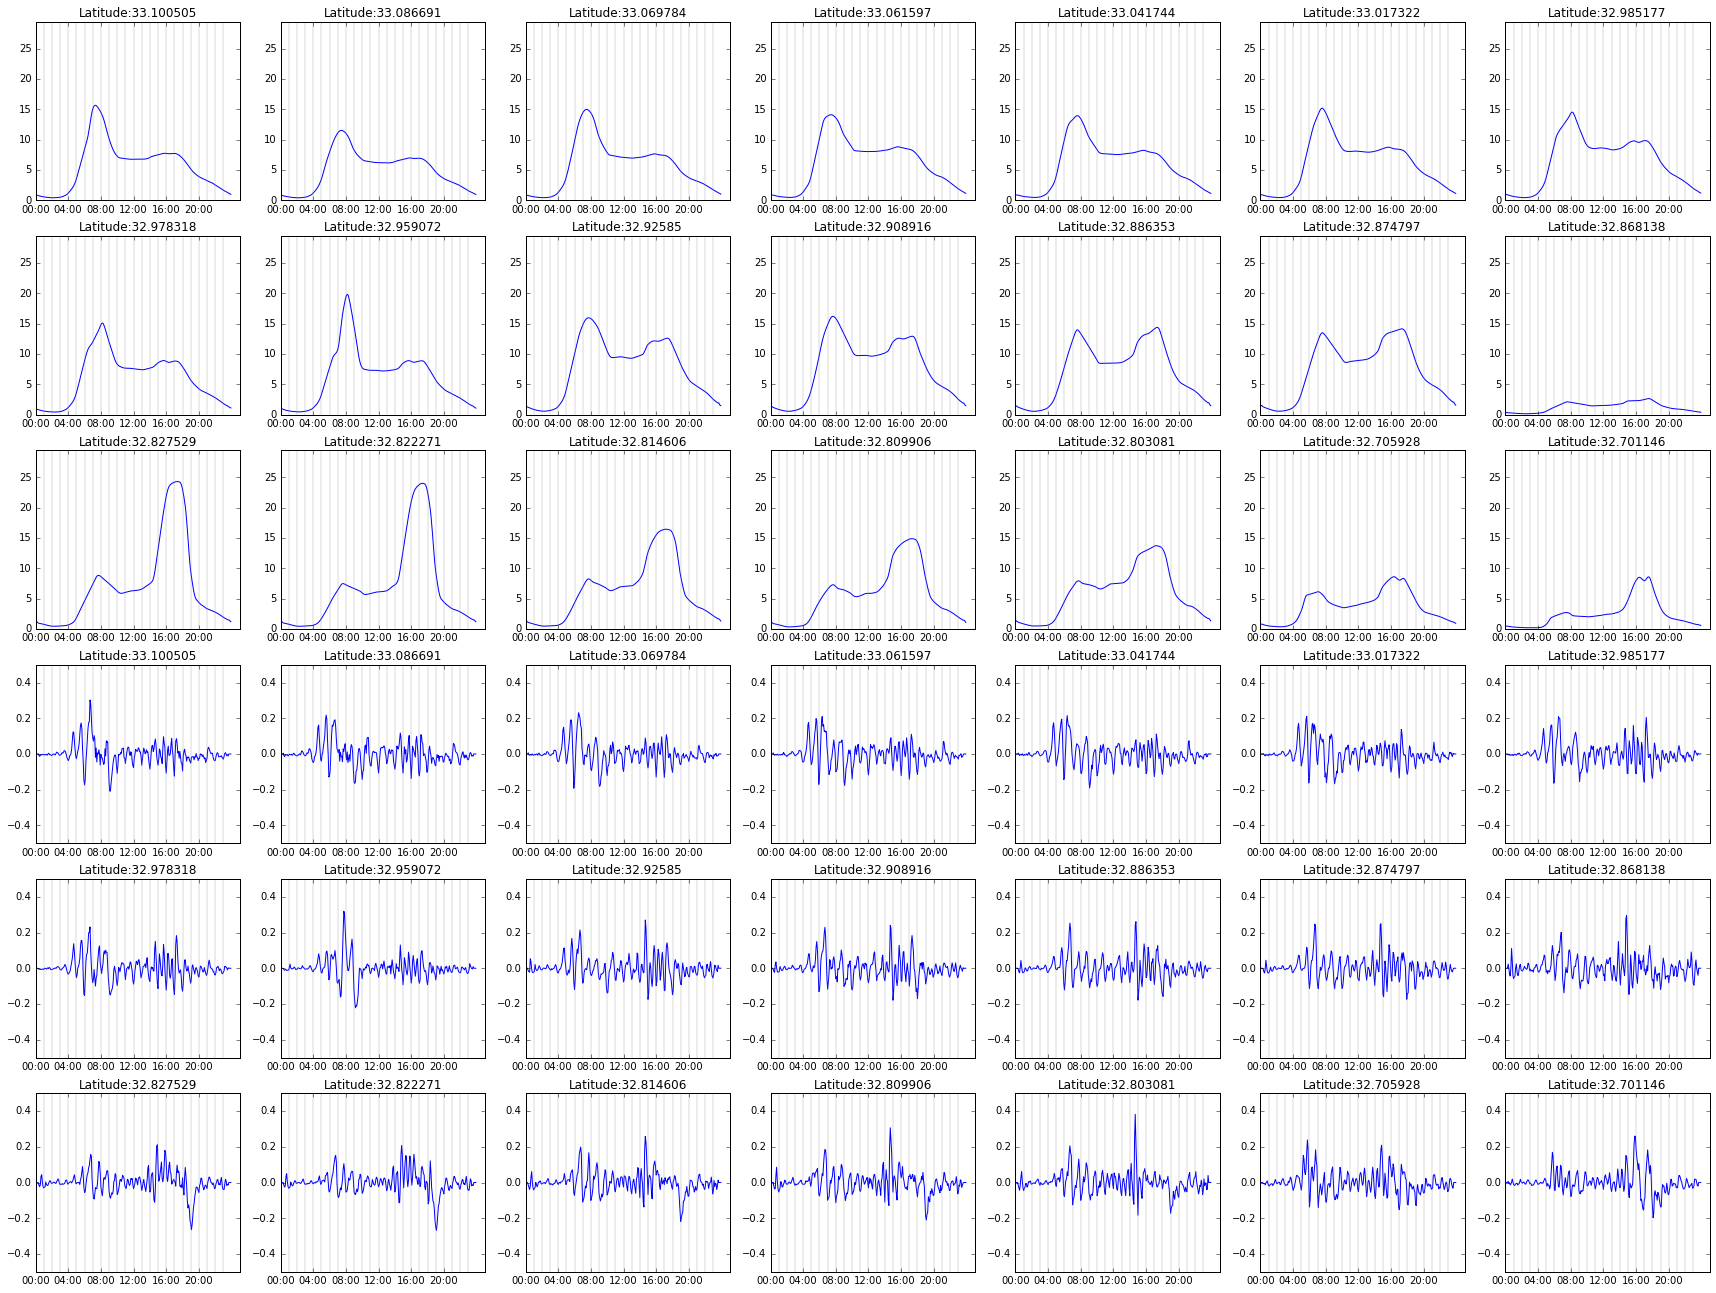

In [19]:
# %run trafficPassion/analyzeWiggles.py
AnalyzeWiggles.chartMetrics(AnalyzeWiggles.getRankOneStations(i15S),
                            title="Total Weekday Density For Healthy Stations", type="akima", factor=8,
                            days='Weekdays', metrics='AvgDensity', stationGrid=10)

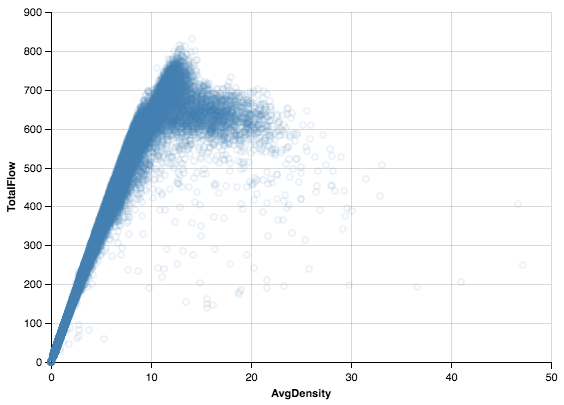

In [22]:
from altair import *
from sklearn import linear_model
import pandas as pd
flow_density = i15S[i15S['Station'] == 1108538][['TotalFlow', 'AvgDensity']]


# Get free-flow line by taking the trendline between 0 and the density correspoding to  max flow
Qmax = flow_density['TotalFlow'].max()
pmin = flow_density[flow_density['TotalFlow'] == Qmax]['AvgDensity'].iloc[0]

free_flow = flow_density[flow_density['AvgDensity'] <= pmin]

X = np.array(free_flow[['AvgDensity']])
Y = np.array(free_flow[['TotalFlow']])
regr = linear_model.LinearRegression()
regr.fit(X, Y)

v = regr.coef_[0][0]

chart = LayeredChart(flow_density)
Chart().mark_point(opacity=0.1).encode(x='AvgDensity:Q',y='TotalFlow:Q')

dict = {i: (float(i)*v) for i in range(int(pmin)+1)}
my_line = pd.DataFrame.from_dict(dict, orient='index').reset_index()
my_line.columns = ['density', 'flow']                                               

Chart(my_line).mark_line().encode(x='density:Q', y='flow:Q', color='green')
Chart(flow_density).mark_point(opacity=0.1).encode(x='AvgDensity:Q',y='TotalFlow:Q')
